In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X, y = load_wine(return_X_y=True, as_frame=True)
# scaler = StandardScaler().set_output(transform="pandas")

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.30, random_state=42
# )
# scaled_X_train = scaler.fit_transform(X_train)

In [2]:
import pandas as pd
matches_pd = pd.read_csv("arsenal.csv")

In [3]:
matches_pd["result"] = matches_pd["result"].replace({"W": 0, "D": 1, "L": 2})

C:\Users\Admin\AppData\Local\Temp\ipykernel_15272\368353829.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matches_pd["result"] = matches_pd["result"].replace({"W": 0, "D": 1, "L": 2})


In [4]:
X = matches_pd.drop(columns=["result"])
y = matches_pd["result"]
scaler = StandardScaler().set_output(transform="pandas")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

ValueError: could not convert string to float: 'Home'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


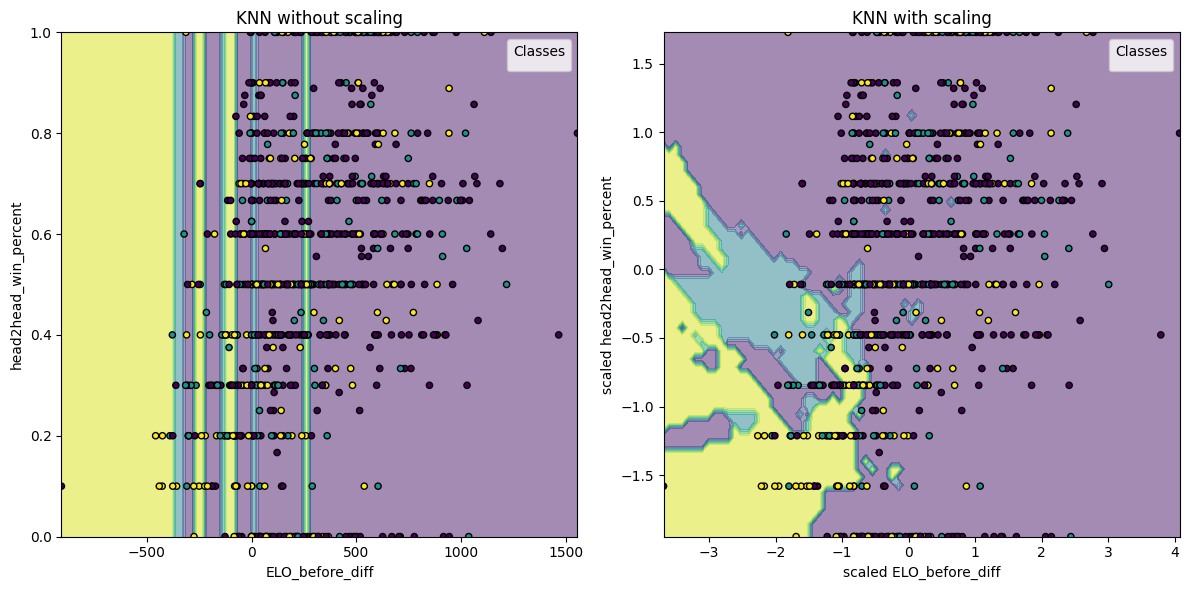

In [11]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

X_plot = X[["ELO_before_diff", "head2head_win_percent"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)

def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["ELO_before_diff"], X_plot["head2head_win_percent"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["ELO_before_diff"].min(), X_plot["ELO_before_diff"].max()))
    disp.ax_.set_ylim((X_plot["head2head_win_percent"].min(), X_plot["head2head_win_percent"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled ELO_before_diff")
ax2.set_ylabel("scaled head2head_win_percent")
ax2.set_title("KNN with scaling")

# Add legend
ax1.legend(title="Classes")
ax2.legend(title="Classes")

_ = plt.tight_layout()

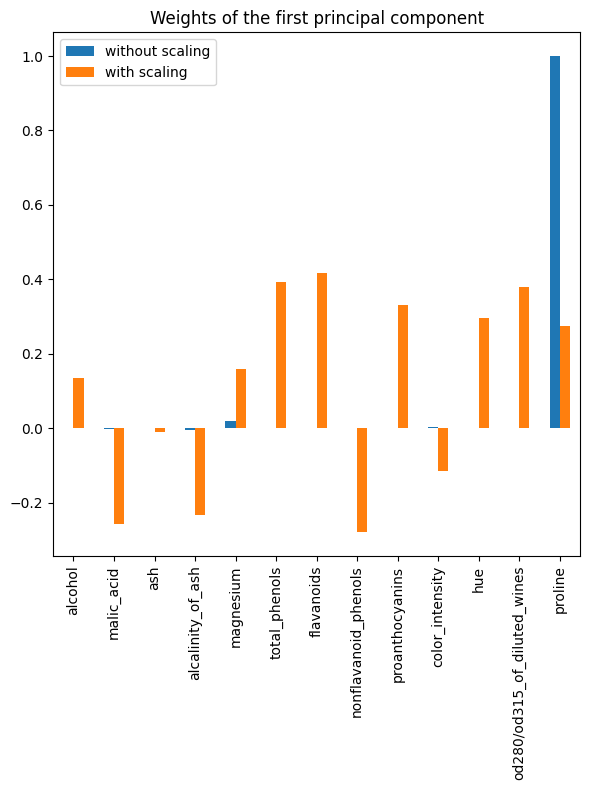

In [3]:
import pandas as pd

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

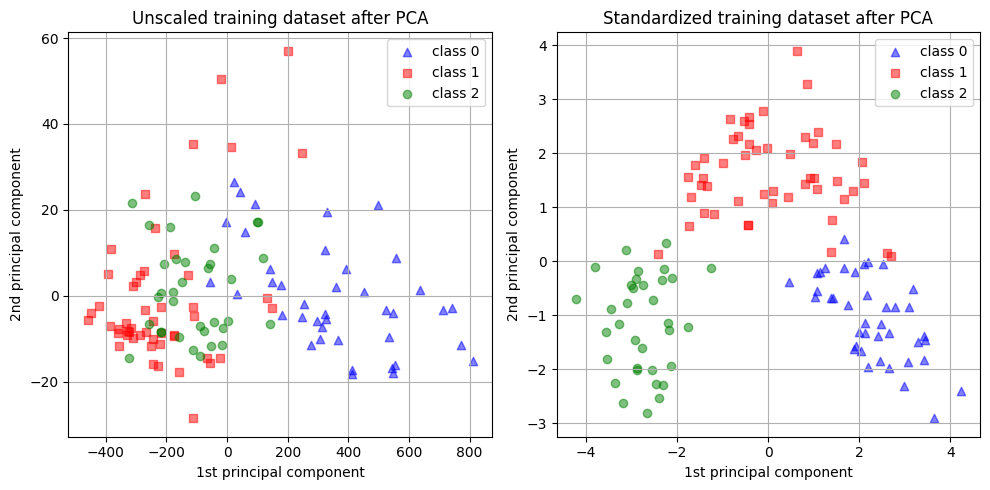

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()